# Dependencies

In [1]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

In [2]:
library(randomcoloR)
library(ggsankey)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Functions

In [3]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/clonetrack.R")

Loading required package: ggalluvial



# Paths

In [4]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [5]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [6]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [7]:
meta_div <- meta_div[ !is.na(meta_div$TRB),]

In [8]:
dim(meta_div)

[1] 504  66

In [9]:
table(meta_div$Disease_type)


  ALCL    ALL    AML   ARMS     BL    BLL    CML  DLBCL   ERMS    EWS     HB 
     9     99     45      6     23     10     13     12     23     34     16 
    HD HR ALL    LFS  MS NB     NB Normal     OS  PMBCL SR ALL  T-ALL  WILMS 
    38     53     10      1     13     14     48      8      7     16      6 

In [10]:
# remove LFS and Normal
meta_div <- meta_div[meta_div$Disease_type != "LFS",]
meta_div <- meta_div[meta_div$Disease_type != "Normal",]

In [11]:
meta_div[ meta_div$Patient == "CHP_394",1:20]

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,CM,Naïve,SCM,TE,EM%,CM%,Naïve%,SCM%,TE%,Naïve/TE
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
673,CHP_394_01,CHP_394,X01,6.2,101.20,17,ERMS,6.2,835,0,115,433,27,260,0.00000,13.772455,51.856287,3.2335329,31.13772,1.66538462
676,CHP_394_04,CHP_394,X04,0.7,140.70,17,ERMS,0.7,2194,280,809,58,2,1045,12.76208,36.873291,2.643573,0.0911577,47.62990,0.05550239
202,CHP_394_02,CHP_394,X02,0.7,235.04,17,ERMS,0.7,712,0,20,97,70,525,0.00000,2.808989,13.623596,9.8314607,73.73596,0.18476190
203,CHP_394_04,CHP_394,X04,0.7,140.70,17,ERMS,0.7,2194,280,809,58,2,1045,12.76208,36.873291,2.643573,0.0911577,47.62990,0.05550239
204,CHP_394_05,CHP_394,X05,0.7,394.40,17,ERMS,0.7,295,35,180,0,0,80,11.86441,61.016949,0.000000,0.0000000,27.11864,0.00000000
3761,CHP_394_01,CHP_394,X00,6.2,101.20,17,ERMS,6.2,835,0,115,433,27,260,0.00000,13.772455,51.856287,3.2335329,31.13772,1.66538462


In [12]:
meta_div[ meta_div$Patient == "CHP_387",c("Patient", "cycle", "sampletype", "TRB", "Reads", "file")]

,Patient,cycle,sampletype,TRB,Reads,file
,<chr>,<chr>,<chr>,<int>,<int>,<chr>
638,CHP_387,X01,PBMC,279,14179,batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_387-01-PBMC-DNA.txt
640,CHP_387,X03,PBMC,58,343,batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_387-03_PBMC_DNA.txt
173,CHP_387,X01,cfDNA,5,15263,batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_387-01_cfDNA.txt
174,CHP_387,X02,cfDNA,4,1749,remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_387-02_cfDNA.txt
175,CHP_387,X03,cfDNA,10,8141,batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_387-03_cfDNA.txt


In [13]:
mytab <- as.data.frame.matrix(table(meta_div$Patient, meta_div$sampletype) )

In [14]:
morethanone <- mytab[rowSums(mytab) > 1, ]

In [15]:
head(morethanone)
dim(morethanone)

,cfDNA,PBMC,Tumor
,<int>,<int>,<int>
CHP_323,2,2,0
CHP_324,2,1,0
CHP_328,1,2,0
CHP_330,1,1,0
CHP_331,1,2,0
CHP_334,3,0,0


[1] 86  3

# some metrics

In [16]:
meta_div[ meta_div$Patient == "CHP_387",c("Patient", "cycle", "sampletype", "TRB", "Reads", "file")]

,Patient,cycle,sampletype,TRB,Reads,file
,<chr>,<chr>,<chr>,<int>,<int>,<chr>
638,CHP_387,X01,PBMC,279,14179,batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_387-01-PBMC-DNA.txt
640,CHP_387,X03,PBMC,58,343,batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_387-03_PBMC_DNA.txt
173,CHP_387,X01,cfDNA,5,15263,batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_387-01_cfDNA.txt
174,CHP_387,X02,cfDNA,4,1749,remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_387-02_cfDNA.txt
175,CHP_387,X03,cfDNA,10,8141,batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_387-03_cfDNA.txt


In [17]:
dim(meta_div)

[1] 480  66

In [18]:
table(meta_div$Group)


CHP 
480 

In [19]:
allTCRs <- sum(meta_div$TRB )

In [20]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/"

In [21]:
colnames(meta_div)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "CD3"               
[10] "EM"                 "CM"                 "Naïve"             
[13] "SCM"                "TE"                 "EM%"               
[16] "CM%"                "Naïve%"             "SCM%"              
[19] "TE%"                "Naïve/TE"           "N+CM+SCM/TE+EM"    
[22] "PD-1"               "PDL1"               "LAG3"              
[25] "TIM3"               "CTLA4"              "PD1%"              
[28] "PDL1%"              "LAG3%"              "TIM3%"             
[31] "CTLA4%"             "Any NCR"            "PD1 + LAG3 + TIM3" 
[34] "cancergroup"        "agegroup"           "foldgroup"         
[37] "Remission"          "Relapse"            "Transplant"        
[40] "CART"               "vital_status"       "LOF"               
[43] "TRB"                "Reads"              "CPKR"              
[46] "Average_reads"      "VMR"                "Max_reads"         
[49] "Singletons"         "Doubletons"         "qD"                
[52] "Sample_Coverage"    "observed_Richness"  "estimated_Richness"
[55] "SE_Richeness"       "observed_Shannon"   "estimated_Shannon" 
[58] "SE_Shannon"         "observed_Simpson"   "estimated_Simpson" 
[61] "SE_Simpson"         "basename"           "file"              
[64] "sampletype"         "Group"              "log10shann"

In [22]:
int_all_list <- list()

for (i in 1:nrow(meta_div)) {
    fle <- meta_div[i, "file"]
    sample <- meta_div[i, "basename"]
    pat <- meta_div[i, "Patient"]
    sampletype <- meta_div[i, "sampletype"]

    onefle <- read.table(paste0(h4hpath, fle), sep = "\t", header = TRUE, stringsAsFactors = F)
    # Remove non-productive
    onefle <- onefle[!grepl("_", onefle$aaSeqCDR3), ]
    onefle <- onefle[!grepl("[*]", onefle$aaSeqCDR3), ]
    # next if the file has no productive cdr3
    if (nrow(onefle) == 0) {
        next
    }
    onefle$file <- fle
    onefle$basename <- sample
    onefle$Patient <- pat
    onefle$sampletype <- sampletype

    int_all_list[length(int_all_list) + 1] <- list(onefle)
}
int_all <- do.call("rbind", int_all_list)


In [23]:
dim(int_all)

[1] 53686    39

In [24]:
head(int_all)

,cloneId,cloneCount,cloneFraction,clonalSequence,clonalSequenceQuality,allVHitsWithScore,allDHitsWithScore,allJHitsWithScore,allCHitsWithScore,allVAlignments,...,aaSeqFR2,aaSeqCDR2,aaSeqFR3,aaSeqCDR3,aaSeqFR4,refPoints,file,basename,Patient,sampletype
,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,37,13,0.15116279,TGTGCCAGCAGGGAAAGGATAGCCCCTGGAAACACCATATATTTT,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV6-5*00(726.3),,TRBJ1-3*00(130),NA,519|530|556|0|11||55.0,...,NA,NA,NA,CASRERIAPGNTIYF,NA,:::::::::0:-6:11:::::25:-2:45:::,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,CHP_319-05-PBMC-DNA,CHP_319,PBMC
2,42,11,0.12790698,TGCAGTGCTAGAGATCGTACGGGAATGTCCACAGATACGCAGTATTTT,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV20-1*00(703.5),"TRBD1*00(25),TRBD2*00(25)",TRBJ2-3*00(110),NA,759|775|793|0|16||80.0,...,NA,NA,NA,CSARDRTGMSTDTQYF,NA,:::::::::0:2:16:19:1:-8:24:29:-2:48:::,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,CHP_319-05-PBMC-DNA,CHP_319,PBMC
3,48,9,0.10465116,TGTGCCAGTAGGCTCGGGACAGGGCATGAGAACACTGAAGCTTTCTTT,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV19*00(373.2),TRBD1*00(50),TRBJ1-1*00(235),NA,559|570|596|0|11||55.0,...,NA,NA,NA,CASRLGTGHENTEAFF,NA,:::::::::0:-6:11:14:1:-3:24:29:-1:48:::,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,CHP_319-05-PBMC-DNA,CHP_319,PBMC
4,50,9,0.10465116,TGTGCCACCAGCAGAGATTGGACAGTCTCCTACGAGCAGTACTTC,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV15*00(439),TRBD1*00(30),TRBJ2-7*00(235),NA,552|570|589|0|18||90.0,...,NA,NA,NA,CATSRDWTVSYEQYF,NA,:::::::::0:1:18:19:-1:-5:25:26:0:45:::,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,CHP_319-05-PBMC-DNA,CHP_319,PBMC
5,63,6,0.06976744,TGTGCCAGCAGCCGAAACAGGGTTAGGTATGGCTACACCTTC,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV11-2*00(299),TRBD1*00(30),TRBJ1-2*00(215),NA,522|534|559|0|12||60.0,...,NA,NA,NA,CASSRNRVRYGYTF,NA,:::::::::0:-5:12:16:-3:-3:22:27:-5:42:::,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,CHP_319-05-PBMC-DNA,CHP_319,PBMC
7,71,5,0.05813953,TGTGCCAGCAGCAAAGATGTCCTAGGGGATAGCTCCTATAATTCACCCCTCCACTTT,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV21-1*00(1009),TRBD1*00(25),TRBJ1-6*00(275),NA,544|560|581|0|16||80.0,...,NA,NA,NA,CASSKDVLGDSSYNSPLHF,NA,:::::::::0:-1:16:17:6:-13:22:30:2:57:::,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,CHP_319-05-PBMC-DNA,CHP_319,PBMC


In [25]:
allTCRs <- nrow(int_all)
# uniqueTCRs <- length(unique(int_all$aaSeqCDR3))

In [26]:
dups <- int_all[duplicated(int_all$aaSeqCDR3),]

In [27]:
allTCRs # total TCRs

[1] 53686

In [28]:
dim(int_all[!duplicated(int_all$aaSeqCDR3),]) # total unique TCRs

[1] 50514    39

In [29]:
dim(dups)

[1] 3172   39

In [30]:
53686 - 3172

[1] 50514

In [31]:
head(int_all[int_all$aaSeqCDR3 %in% "CASSPQGGPHNEQFF", ])

,cloneId,cloneCount,cloneFraction,clonalSequence,clonalSequenceQuality,allVHitsWithScore,allDHitsWithScore,allJHitsWithScore,allCHitsWithScore,allVAlignments,...,aaSeqFR2,aaSeqCDR2,aaSeqFR3,aaSeqCDR3,aaSeqFR4,refPoints,file,basename,Patient,sampletype
,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>
9100,34,111,0.0280020182,TGTGCCAGCAGCCCCCAAGGGGGGCCTCACAATGAGCAGTTCTTC,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV7-6*00(985),TRBD1*00(30),TRBJ2-1*00(195.5),NA,576|588|613|0|12||60.0,...,NA,NA,NA,CASSPQGGPHNEQFF,NA,:::::::::0:-5:12:17:-5:-1:23:28:-5:45:::,batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_323-03-PBMC-DNA.txt,CHP_323-03-PBMC-DNA,CHP_323,PBMC
93150,482,52,0.0005079167,TGTGCCAGCAGCCCCCAAGGGGGGCCTCACAATGAGCAGTTCTTC,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV7-7*00(93.9),TRBD1*00(30),TRBJ2-1*00(228.3),NA,585|597|622|0|12||60.0,...,NA,NA,NA,CASSPQGGPHNEQFF,NA,:::::::::0:-5:12:17:-5:-1:23:28:-5:45:::,batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_323-03_cfDNA.txt,CHP_323-03_cfDNA,CHP_323,cfDNA


Public TCRs

Patient-specific recurring

In [42]:
tcr_pat_tab <- as.data.frame.matrix(table(int_all$aaSeqCDR3, int_all$Patient))

In [43]:
dim(tcr_pat_tab)

[1] 50514    99

In [44]:
head(tcr_pat_tab)

,CHP_319,CHP_323,CHP_324,CHP_326,CHP_328,CHP_329,CHP_330,CHP_331,CHP_333,CHP_334,...,CHP_414,CHP_415,CHP_416,CHP_417,CHP_418,CHP_419,CHP_420,CHP_421,CHP_422,CHP_423
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
CAAAGGGEAFF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAAAGGSGVGYEQYF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAAARGFDEQYF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAACEPEVRDTDTQYF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAAEPRLAGGTDTQYF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAAGDRGPIVYEQYF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
tcr_pat_tab$no_patients_morethanone <- rowSums(tcr_pat_tab[,1:99] > 1) # count number of TCRs happening in more than one sample per patient
tcr_pat_tab$no_patients_one <- rowSums(tcr_pat_tab[,1:99] == 1)
tcr_pat_tab$no_patients_none <- rowSums(tcr_pat_tab[,1:99] == 0)

In [46]:
tcr_pat_tab$no_patients <- tcr_pat_tab$no_patients_one + tcr_pat_tab$no_patients_morethanone

In [102]:
dim(tcr_pat_tab)

[1] 50514   103

In [47]:
head(tcr_pat_tab[ tcr_pat_tab$no_patients_morethanone > 0,])

,CHP_319,CHP_323,CHP_324,CHP_326,CHP_328,CHP_329,CHP_330,CHP_331,CHP_333,CHP_334,...,CHP_418,CHP_419,CHP_420,CHP_421,CHP_422,CHP_423,no_patients_morethanone,no_patients_one,no_patients_none,no_patients
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
CAACEPEVRDTDTQYF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,98,1
CACNQVMNTEAFF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,97,2
CAERPGQGLNCYTF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,98,1
CAGGGGRVGEKLFF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,98,1
CAGGTGQDATNEKLFF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,98,1
CAGRSGKGAAYNEQFF,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,12,86,13


In [98]:
dim(tcr_pat_tab[tcr_pat_tab$no_patients_morethanone == 1 & tcr_pat_tab$no_patients_none == 98, ]) #  patient-specific TCRs in more than one sample in one patient
patient_specific <- rownames(tcr_pat_tab)[tcr_pat_tab$no_patients_morethanone == 1 & tcr_pat_tab$no_patients_none == 98 ]

[1] 780 103

In [108]:
tcr_pat_tab[tcr_pat_tab$no_patients > 9, ]

,CHP_319,CHP_323,CHP_324,CHP_326,CHP_328,CHP_329,CHP_330,CHP_331,CHP_333,CHP_334,...,CHP_418,CHP_419,CHP_420,CHP_421,CHP_422,CHP_423,no_patients_morethanone,no_patients_one,no_patients_none,no_patients
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
CAGRSGKGAAYNEQFF,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,12,86,13
CASRARELNTEAFF,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,10,89,10
CASSHDREQETQYF,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,12,87,12
CASSLGRNQPQHF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9,89,10
CASSLRPPDIQYF,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,17,81,18
CASSPDRGRYQETQYF,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,6,21,72,27
CASSRFAGGSGNTIYF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9,89,10
CATSDSGGLSNQPQHF,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,12,87,12
CSVFTGGAPGEQYF,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,10,89,10


In [100]:
dim(tcr_pat_tab[tcr_pat_tab$no_patients > 1 & tcr_pat_tab$no_patients_none < 98, ]) # public tcrs occuring in more than one patient (in at least one of their samples)
public <- rownames(tcr_pat_tab)[tcr_pat_tab$no_patients > 0 & tcr_pat_tab$no_patients_none < 98 ]

[1] 1482  103

In [105]:
1482 / 50514 * 100

780 / 50514 * 100

[1] 2.93384

[1] 1.544126

In [101]:
summary(tcr_pat_tab$no_patients[tcr_pat_tab$no_patients > 1 & tcr_pat_tab$no_patients_none < 98 ])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   2.000   2.474   2.000  27.000 

In [50]:
# # create a df with 4 rows, total, unique, public, patient-specific and 2 cols, name and count
# tcr_pat_tab_df <- data.frame(name = c("Total", "Unique", "Public", "Patient-specific"), 
# count = c(allTCRs, uniqueTCRs, tcr_in_morethanonepat, patient_specific))

In [51]:
# tcr_pat_tab_df$Percentage <- round(tcr_pat_tab_df$count / allTCRs * 100, 2)

Add TIGERDB search

In [109]:
# tigerdb_output <- read.table(x)

In [110]:
head(tcr_pat_tab)

,CHP_319,CHP_323,CHP_324,CHP_326,CHP_328,CHP_329,CHP_330,CHP_331,CHP_333,CHP_334,...,CHP_418,CHP_419,CHP_420,CHP_421,CHP_422,CHP_423,no_patients_morethanone,no_patients_one,no_patients_none,no_patients
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
CAAAGGGEAFF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,98,1
CAAAGGSGVGYEQYF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,98,1
CAAARGFDEQYF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,98,1
CAACEPEVRDTDTQYF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,98,1
CAAEPRLAGGTDTQYF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,98,1
CAAGDRGPIVYEQYF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,98,1


In [112]:
tcr_pat_tab$db_annot <- NA


# Sankey plot

In [113]:
dim(int_all)

[1] 53686    40

In [114]:
int_all$basename_tcr <- paste0(int_all$basename, "_", int_all$aaSeqCDR3)

In [115]:
sankey_rows <- data.frame(int_all[, c("basename_tcr", "basename", "aaSeqCDR3", "Patient", "sampletype")])

In [116]:
sankey_rows$all <- "All"

In [117]:
head(sankey_rows)

,basename_tcr,basename,aaSeqCDR3,Patient,sampletype,all
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,CHP_319-05-PBMC-DNA_CASRERIAPGNTIYF,CHP_319-05-PBMC-DNA,CASRERIAPGNTIYF,CHP_319,PBMC,All
2,CHP_319-05-PBMC-DNA_CSARDRTGMSTDTQYF,CHP_319-05-PBMC-DNA,CSARDRTGMSTDTQYF,CHP_319,PBMC,All
3,CHP_319-05-PBMC-DNA_CASRLGTGHENTEAFF,CHP_319-05-PBMC-DNA,CASRLGTGHENTEAFF,CHP_319,PBMC,All
4,CHP_319-05-PBMC-DNA_CATSRDWTVSYEQYF,CHP_319-05-PBMC-DNA,CATSRDWTVSYEQYF,CHP_319,PBMC,All
5,CHP_319-05-PBMC-DNA_CASSRNRVRYGYTF,CHP_319-05-PBMC-DNA,CASSRNRVRYGYTF,CHP_319,PBMC,All
7,CHP_319-05-PBMC-DNA_CASSKDVLGDSSYNSPLHF,CHP_319-05-PBMC-DNA,CASSKDVLGDSSYNSPLHF,CHP_319,PBMC,All


In [118]:
mytb <- as.data.frame(table(sankey_rows$aaSeqCDR3))

In [119]:
nrow(mytb) # total unique sequences

nrow(mytb[mytb$Freq > 1,]) # total sequences that occur more than once

[1] 50514

[1] 2262

In [120]:
2262 / 50514 * 100

[1] 4.477967

In [121]:
summary(mytb$Freq[mytb$Freq > 1])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   2.000   2.402   2.000  33.000 

In [122]:
head(sankey_rows)

,basename_tcr,basename,aaSeqCDR3,Patient,sampletype,all
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,CHP_319-05-PBMC-DNA_CASRERIAPGNTIYF,CHP_319-05-PBMC-DNA,CASRERIAPGNTIYF,CHP_319,PBMC,All
2,CHP_319-05-PBMC-DNA_CSARDRTGMSTDTQYF,CHP_319-05-PBMC-DNA,CSARDRTGMSTDTQYF,CHP_319,PBMC,All
3,CHP_319-05-PBMC-DNA_CASRLGTGHENTEAFF,CHP_319-05-PBMC-DNA,CASRLGTGHENTEAFF,CHP_319,PBMC,All
4,CHP_319-05-PBMC-DNA_CATSRDWTVSYEQYF,CHP_319-05-PBMC-DNA,CATSRDWTVSYEQYF,CHP_319,PBMC,All
5,CHP_319-05-PBMC-DNA_CASSRNRVRYGYTF,CHP_319-05-PBMC-DNA,CASSRNRVRYGYTF,CHP_319,PBMC,All
7,CHP_319-05-PBMC-DNA_CASSKDVLGDSSYNSPLHF,CHP_319-05-PBMC-DNA,CASSKDVLGDSSYNSPLHF,CHP_319,PBMC,All


In [123]:
uniquetcrs <- unique(int_all$aaSeqCDR3)

In [124]:
length(uniquetcrs)

[1] 50514

In [125]:
dim(int_all)

[1] 53686    40

In [126]:
sankey_rows$unique_tcr <- NA
sankey_rows$unique_tcr[!sankey_rows$aaSeqCDR3 %in% dups$aaSeqCDR3] <- "Found once"
sankey_rows$unique_tcr[sankey_rows$aaSeqCDR3 %in% dups$aaSeqCDR3] <- "Found more than once"

In [127]:
table(sankey_rows$unique_tcr)


Found more than once           Found once 
                5434                48252 

In [128]:
head(public)

[1] "CACGGTGNYNEQFF"   "CACNQVMNTEAFF"    "CAGRSGKGAAYNEQFF" "CAIKDQGSGNTIYF"  
[5] "CAIPTGNTGELFF"    "CAIRGRIGTEAFF"

In [129]:
sankey_rows$public_tcr <- NA
sankey_rows$public_tcr[sankey_rows$aaSeqCDR3 %in% public] <- "Public"
sankey_rows$public_tcr[!sankey_rows$aaSeqCDR3 %in% public] <- NA

In [130]:
dim(tcr_pat_tab)

[1] 50514   104

In [131]:
sankey_rows$public_tcr[sankey_rows$aaSeqCDR3 %in% patient_specific] <- "patient_specific"

In [132]:
# #factor tcr_pat_tab_df$name
# tcr_pat_tab_df$name <- factor(tcr_pat_tab_df$name, levels = c("Total", "Unique", "Public", "Patient-specific"))

In [133]:
table(sankey_rows$public_tcr)


patient_specific           Public 
            1616             3818 

In [134]:
head(sankey_rows)

,basename_tcr,basename,aaSeqCDR3,Patient,sampletype,all,unique_tcr,public_tcr
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,CHP_319-05-PBMC-DNA_CASRERIAPGNTIYF,CHP_319-05-PBMC-DNA,CASRERIAPGNTIYF,CHP_319,PBMC,All,Found once,NA
2,CHP_319-05-PBMC-DNA_CSARDRTGMSTDTQYF,CHP_319-05-PBMC-DNA,CSARDRTGMSTDTQYF,CHP_319,PBMC,All,Found once,NA
3,CHP_319-05-PBMC-DNA_CASRLGTGHENTEAFF,CHP_319-05-PBMC-DNA,CASRLGTGHENTEAFF,CHP_319,PBMC,All,Found once,NA
4,CHP_319-05-PBMC-DNA_CATSRDWTVSYEQYF,CHP_319-05-PBMC-DNA,CATSRDWTVSYEQYF,CHP_319,PBMC,All,Found once,NA
5,CHP_319-05-PBMC-DNA_CASSRNRVRYGYTF,CHP_319-05-PBMC-DNA,CASSRNRVRYGYTF,CHP_319,PBMC,All,Found once,NA
7,CHP_319-05-PBMC-DNA_CASSKDVLGDSSYNSPLHF,CHP_319-05-PBMC-DNA,CASSKDVLGDSSYNSPLHF,CHP_319,PBMC,All,Found once,NA


In [135]:
sankey_rows$db_annot <- tcr_pat_tab$db_annot[ match(sankey_rows$aaSeqCDR3, rownames(tcr_pat_tab))]

In [149]:
# dummy input
sankey_rows$db_annot <- NA
sankey_rows$db_annot[which(sankey_rows$public_tcr == "Public")][1:10] <- "HomoSap"
sankey_rows$db_annot[which(sankey_rows$public_tcr == "Public")][11:25] <- "Viral"

In [95]:
# write.csv(unique(sankey_rows$aaSeqCDR3[ which(sankey_rows$public_tcr == "patient_specific")]), paste0("~/Downloads/sankey_rows_patient_specific.csv"), row.names = F)

# write.csv(unique(sankey_rows$aaSeqCDR3[ which(sankey_rows$public_tcr == "Public")]), paste0("~/Downloads/sankey_rows_public.csv"), row.names = F)

In [150]:
df <- make_long(sankey_rows, all, unique_tcr, public_tcr, db_annot)

In [138]:
# df$next_node <- factor(df$next_node, levels = c('ALCL','BL','BLL','DLBCL','ERMS','HD',
#                                       'Lymphoma','n = 4','n = 17','n = 2','n = 23',
#                                       'n = 21','n = 25','NB','OS','PMBCL','Solid'))

# df$node <- factor(df$node, levels = c('ALCL','BL','BLL','DLBCL','ERMS','HD',
#                                       'Lymphoma','n = 4','n = 17','n = 2','n = 23',
#                                       'n = 21','n = 25','NB','OS','PMBCL','Solid'))

In [139]:
# library(randomcoloR)
# set.seed(5250)
# myColors <- distinctColorPalette(17)
# names(myColors) <- levels(factor(df$node))

In [140]:
# #failed samples color grey
# myColors["n = 2"] <- "grey"
# myColors["n = 4"] <- "grey"

In [141]:
# # Tumor types white
# myColors[names(myColors) %in% c("ALCL", "BL", "BLL", "DLBCL", "ERMS", "HD", "PMBCL", "NB", "OS")] <- "white"

In [142]:
head(df)

x,node,next_x,next_node
<fct>,<chr>,<fct>,<chr>
all,All,unique_tcr,Found once
unique_tcr,Found once,public_tcr,NA
public_tcr,NA,db_annot,HomoSap
db_annot,HomoSap,NA,NA
all,All,unique_tcr,Found once
unique_tcr,Found once,public_tcr,NA


In [158]:
sankey <- ggplot(df, aes(x = x, 
               next_x = next_x, 
               node = node, 
               next_node = next_node,
               fill = node, #color = node,
               label = node#, fill.node = node
               )) +
  geom_sankey(flow.alpha = 0.5, na.rm = TRUE, node.color = "black") +
  theme_sankey(base_size = 16) +
  geom_sankey_label(size = 5, hjust = 0.5,# vjust = 0.2,
                    color = 1, label.size = 0,
                    fill = alpha("white",0), na.rm = TRUE) +
theme(legend.position = "none", 
      axis.title.x = element_blank(),
      axis.text.x = element_text(size = 20, color = "black"),
     plot.title = element_text(hjust = 0.5, size = 30)) 
#scale_fill_manual(values = myColors, na.value="white")+
#scale_color_manual(values = myColors, na.value="white") +
# labs(title = "Tumor sample processing")

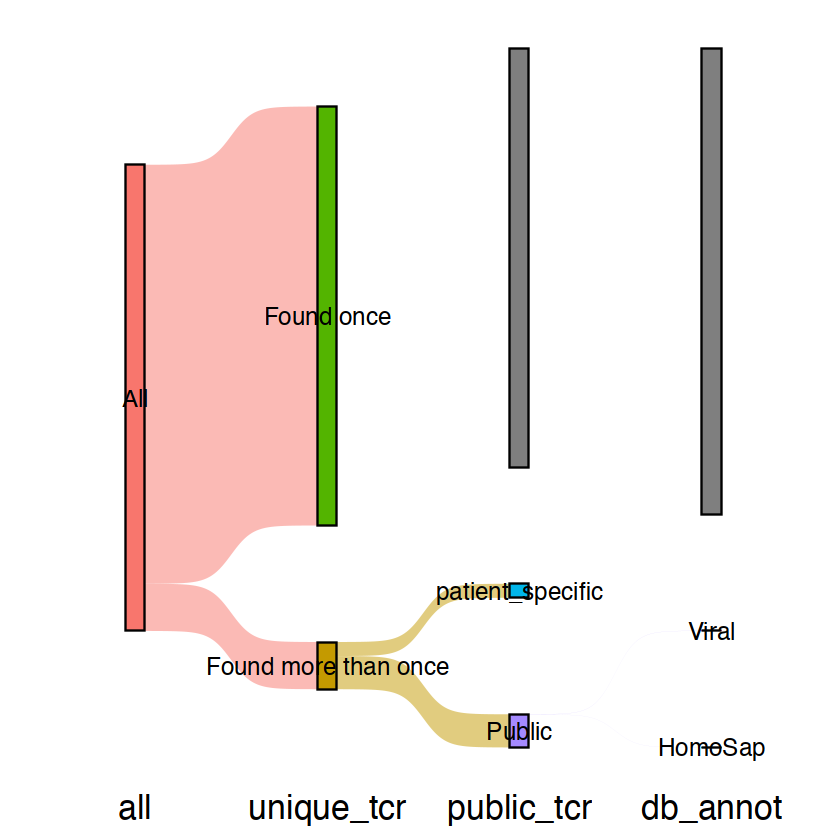

In [159]:
sankey

In [160]:
pdf(paste0(plotpath, "tcr_sankey.pdf"),
   width = 12, height = 6)
sankey
dev.off()

pdf 
  2